In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
from PIL import Image as im 

In [3]:
data = pd.read_csv("SIRS_data.txt", sep=" ",header = None)

In [12]:
dt = np.array(data)

In [46]:
dt[0]

array([ 0.,  1.,  6.,  3.,  4.,  1.,  0.,  5.,  5.,  7.,  3.,  4.,  6.,
        0.,  0.,  4.,  5.,  0.,  3.,  0.,  3.,  5.,  4.,  7.,  6.,  4.,
        0.,  5.,  3.,  5.,  7.,  6.,  2.,  0.,  5.,  2.,  5.,  6.,  7.,
        2.,  1.,  7.,  5.,  6.,  5.,  0.,  5.,  7.,  2.,  3.,  6.,  3.,
        1.,  2.,  2.,  1.,  3.,  7.,  7.,  0.,  7.,  4.,  4.,  2.,  7.,
        3.,  2.,  0.,  7.,  0.,  4.,  3.,  2.,  7.,  4.,  3.,  7.,  0.,
        6.,  6.,  6.,  1.,  0.,  5.,  6.,  5.,  5.,  5.,  7.,  7.,  1.,
        2.,  2.,  4.,  4.,  6.,  3.,  6.,  2.,  3., nan])

In [47]:
np.zeros(19)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [33]:
len(dt[0])

101

In [28]:
list(range(0, 5))

[0, 1, 2, 3, 4]

In [48]:
def one_frame(a):
    N = int(mth.sqrt(len(a)-1))
    b = np.zeros((N, N),float)
    for i in range(0,N):
        for j in range(0,N):
            b[i][j] = a[N*i + j]
    return (b)

In [49]:
one_frame(dt[0])

array([[0., 1., 6., 3., 4., 1., 0., 5., 5., 7.],
       [3., 4., 6., 0., 0., 4., 5., 0., 3., 0.],
       [3., 5., 4., 7., 6., 4., 0., 5., 3., 5.],
       [7., 6., 2., 0., 5., 2., 5., 6., 7., 2.],
       [1., 7., 5., 6., 5., 0., 5., 7., 2., 3.],
       [6., 3., 1., 2., 2., 1., 3., 7., 7., 0.],
       [7., 4., 4., 2., 7., 3., 2., 0., 7., 0.],
       [4., 3., 2., 7., 4., 3., 7., 0., 6., 6.],
       [6., 1., 0., 5., 6., 5., 5., 5., 7., 7.],
       [1., 2., 2., 4., 4., 6., 3., 6., 2., 3.]])

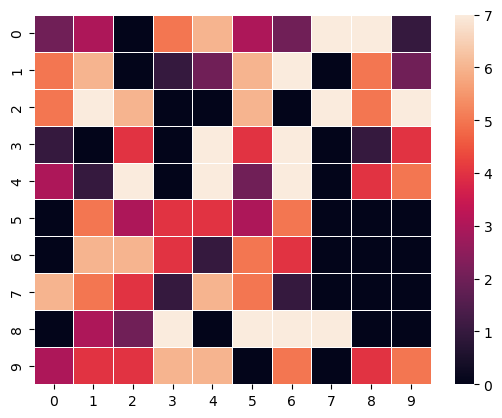

In [66]:
ax = sns.heatmap(one_frame(dt[2]), linewidth=0.5)
plt.show()

In [59]:
print(one_frame(dt[0]).shape)

(10, 10)


In [ ]:
for i in range(0,11):
    image = im.15(one_frame(dt[i]))
    image.save("

In [ ]:
image = im.fromarray(one_frame(dt[0]))
im.save("sudeep.png")